# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Ramicane were the most used treatment regimen on mice in this study.
- In a test treatment regimen between Capomulin, Ramicane, Infubinol, and Ceftamin, both Capomulin and Ramicane showed the most efficacy of the group.
- Overall in tests, Capomulin reduced the average tumor volume over a course of 40 days to approx. 41 mm3 from a starting point of 45 mm3 as observed in I509.
- Capomulin also showed a linear and predictable comparison in its sample with a correlation coefficient between mouse weights and average tumor volume of 0.84.
- There were also no outliers in the Capomulin and Ramicane samples based on the statistical analysis. 

- In the sample size, Mouse gender was almost 50/50 with 51% male, and 49% female mouse participants.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data = pd.merge(study_results, mouse_metadata, how="right", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [2]:
# Checking the number of mice.
number_of_mice = len(study_data["Mouse ID"].unique())
number_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplication_of_mice = study_data[study_data.duplicated(subset= ["Mouse ID", "Timepoint"], keep=False)]
duplication_mice_IDs = duplication_of_mice['Mouse ID'].unique()
duplication_mice_IDs

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplication_of_mice = study_data[study_data.duplicated(subset= ['Mouse ID', 'Timepoint'], keep=False)]
duplication_of_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_data_clean = study_data[study_data["Mouse ID"] != 'g989']

study_data_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16
...,...,...,...,...,...,...,...,...
1888,z969,25,63.145652,2,Naftisol,Male,9,30
1889,z969,30,65.841013,3,Naftisol,Male,9,30
1890,z969,35,69.176246,4,Naftisol,Male,9,30
1891,z969,40,70.314904,4,Naftisol,Male,9,30


In [6]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_cleaned = len(study_data_clean["Mouse ID"].unique())

number_of_mice_cleaned

248

## Summary Statistics

In [7]:
study_data_clean.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_by_drug_regimen = study_data_clean.groupby("Drug Regimen")

statistics = grouped_by_drug_regimen["Tumor Volume (mm3)"].describe()

statistics = statistics.rename(columns = {"mean":"Mean Tumor Volume", "50%": "Median Tumor Volume", "std": "Tumor Volume Std. Dev."})

statistics.drop(['count', 'min', '25%', '75%', 'max'], axis=1, inplace=True)

var = grouped_by_drug_regimen['Tumor Volume (mm3)'].var()
sem = grouped_by_drug_regimen["Tumor Volume (mm3)"].sem()

statistics['Tumor Volume Variance'] = var
statistics['Tumor Volume Std. Err.'] = sem

columnorder = ["Mean Tumor Volume", "Median Tumor Volume", "Tumor Volume Variance", "Tumor Volume Std. Dev.", "Tumor Volume Std. Err."]

# statistics = statistics.reindex(columns = columnorder)

statistics

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


,Mean Tumor Volume,Tumor Volume Std. Dev.,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,4.994774,41.557809,24.947764,0.329346
Ceftamin,52.591172,6.268188,51.776157,39.290177,0.469821
Infubinol,52.884795,6.567243,51.820584,43.128684,0.492236
Ketapril,55.235638,8.279709,53.698743,68.553577,0.603860
Naftisol,54.331565,8.134708,52.509285,66.173479,0.596466
Placebo,54.033581,7.821003,52.288934,61.168083,0.581331
Propriva,52.320930,6.622085,50.446266,43.852013,0.544332
Ramicane,40.216745,4.846308,40.673236,23.486704,0.320955
Stelasyn,54.233149,7.710419,52.431737,59.450562,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

grouped_by_drug_regimen_base = study_data_clean.groupby("Drug Regimen")

base_statistics = grouped_by_drug_regimen_base["Tumor Volume (mm3)"].describe()

base_statistics = base_statistics.rename(columns={"50%":"median"})

base_statistics.drop(['count', 'min', '25%', '75%', 'max'], axis=1, inplace=True)

var = grouped_by_drug_regimen_base["Tumor Volume (mm3)"].var()
sem = grouped_by_drug_regimen_base["Tumor Volume (mm3)"].sem()

base_statistics['var'] = var
base_statistics['sem'] = sem

columnorder = ["mean", "median", "var", "std", "sem"]
base_statistics = base_statistics.reindex(columns = columnorder)

# title = "Tumor Volume (mm3)"

base_statistics

# Using the aggregation method, produce the same summary statistics in a single line


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

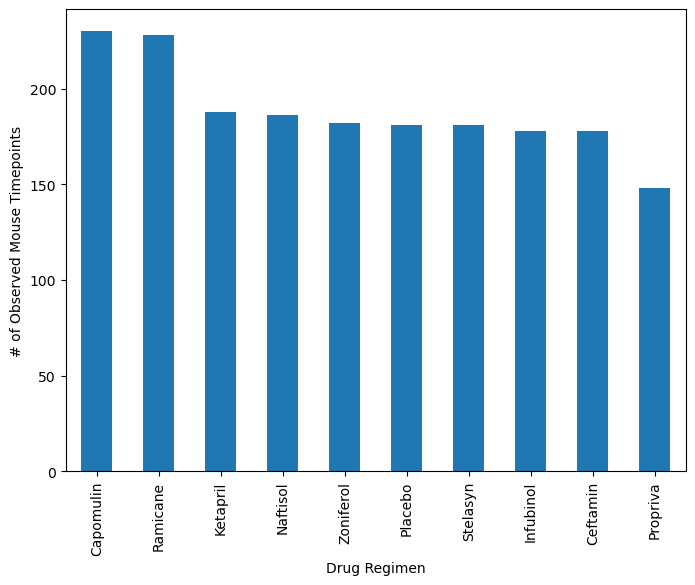

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_panda = study_data_clean["Drug Regimen"].value_counts()

bar_panda.plot(kind="bar", figsize=(8,6), xlabel = "Drug Regimen", ylabel = "# of Observed Mouse Timepoints")

plt.show()

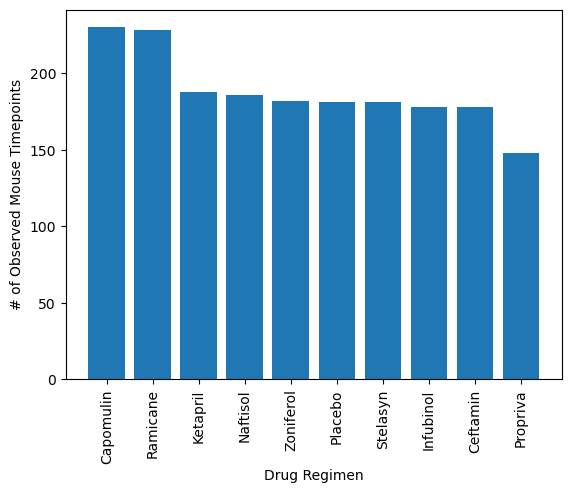

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen = bar_panda

x_axis = regimen.index

plt.bar(x_axis, regimen, alpha = 1, align = "center")

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)

plt.show()



In [12]:
study_data_clean.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

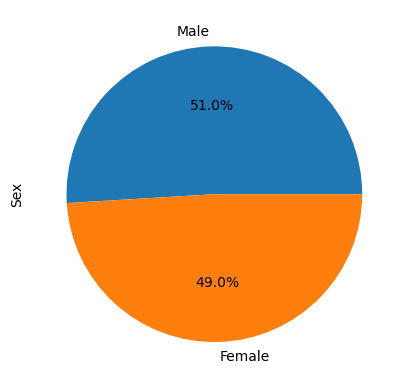

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_panda = study_data_clean["Sex"].value_counts()

pie_panda.plot(kind="pie", autopct="%1.1f%%", y='Sex', startangle=0)
plt.ylabel("Sex")

plt.show()

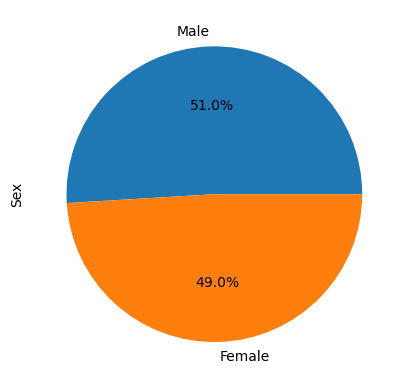

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = pie_panda

x_axis = sex.index

plt.pie(sex, labels = x_axis, autopct="%1.1f%%", startangle=0)
plt.ylabel("Sex")
plt.xticks(rotation=90)

plt.show()


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = study_data_clean.groupby(['Mouse ID'])['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_vol = pd.DataFrame(last_timepoint).merge(study_data_clean, on=['Mouse ID', 'Timepoint'])

target_treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

final_tumor_vol_filtered = final_tumor_vol[final_tumor_vol['Drug Regimen'].isin(target_treatments)]

final_tumor_vol

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [16]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

tumor_vol_data = []

for treatment in treatments:
    treatment_tumor_vol = final_tumor_vol_filtered.loc[final_tumor_vol_filtered['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    tumor_vol_data.append(treatment_tumor_vol)
    
    quartiles = treatment_tumor_vol.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    potential_outliers = final_tumor_vol_filtered[(final_tumor_vol_filtered['Drug Regimen'] == treatment) & ((final_tumor_vol['Tumor Volume (mm3)'] < lower_bound) | (final_tumor_vol['Tumor Volume (mm3)'] > upper_bound))]
    
    if potential_outliers.empty:
        print(f"No outliers for {treatment}")
    else:
        print(f"Potential outliers for {treatment}:")
        print(potential_outliers)
        
    print()

for i, treatment in enumerate(treatments):
    print(f"Tumor volume data for {treatment}:")
    print(tumor_vol_data[i])


No outliers for Capomulin

No outliers for Ramicane

Potential outliers for Infubinol:
   Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
31     c326          5           36.321346                 0    Infubinol   

       Sex  Age_months  Weight (g)  
31  Female          18          25  

No outliers for Ceftamin

Tumor volume data for Capomulin:
19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
80     47.685963
83     37.311846
85     38.125164
87     38.753265
108    41.483008
115    38.846876
121    28.430964
124    33.329098
162    46.539206
163    32.377357
169    41.581521
174    23.343598
180    40.728578
183    34.455298
192    31.023923
204    40.658124
208    39.952347
220    36.041047
226    28.484033
239    31.896238
Name: Tumor Volume (mm3), dtype: float64
Tumor volume data for Ramicane:
6      38.407618
7      43.047543
10     38.810366
12     32.978522
33     38.342008
37     33.397653
45     37.311236
52     

C:\Users\Master Taseen\AppData\Local\Temp\ipykernel_9772\3117647410.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  potential_outliers = final_tumor_vol_filtered[(final_tumor_vol_filtered['Drug Regimen'] == treatment) & ((final_tumor_vol['Tumor Volume (mm3)'] < lower_bound) | (final_tumor_vol['Tumor Volume (mm3)'] > upper_bound))]
C:\Users\Master Taseen\AppData\Local\Temp\ipykernel_9772\3117647410.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  potential_outliers = final_tumor_vol_filtered[(final_tumor_vol_filtered['Drug Regimen'] == treatment) & ((final_tumor_vol['Tumor Volume (mm3)'] < lower_bound) | (final_tumor_vol['Tumor Volume (mm3)'] > upper_bound))]
C:\Users\Master Taseen\AppData\Local\Temp\ipykernel_9772\3117647410.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  potential_outliers = final_tumor_vol_filtered[(final_tumor_vol_filtered['Drug Regimen'] == treatment) & ((f

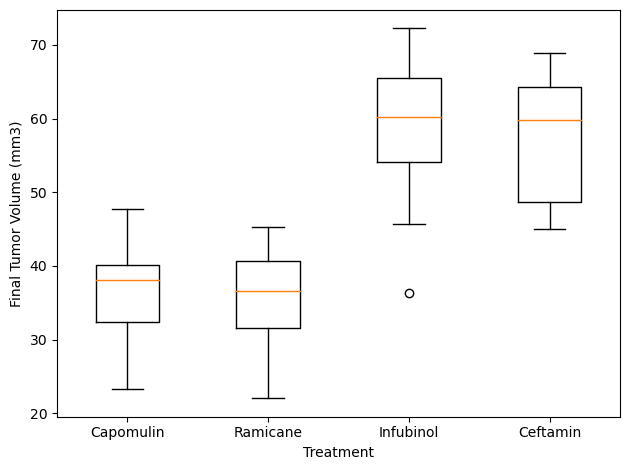

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatments)
plt.xlabel('Treatment')
plt.ylabel('Final Tumor Volume (mm3)')

plt.tight_layout()
plt.show()

## Line and Scatter Plots

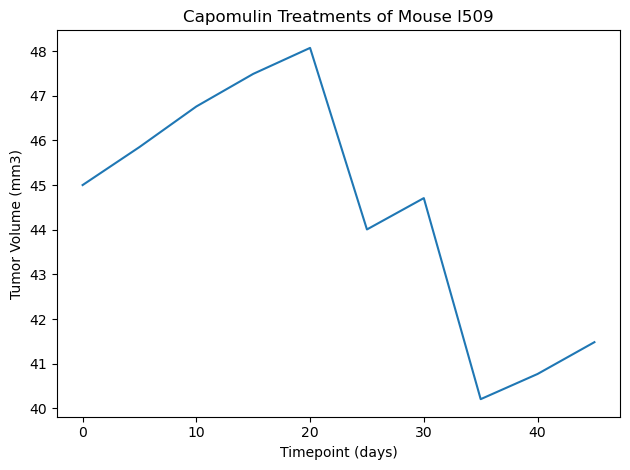

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse_id = "l509"

capomulin_mouse_data = study_data_clean.loc[(study_data_clean['Mouse ID'] == mouse_id) & (study_data_clean['Drug Regimen'] == 'Capomulin')]

plt.plot(capomulin_mouse_data['Timepoint'], capomulin_mouse_data['Tumor Volume (mm3)'])

plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin Treatments of Mouse {mouse_id}')

plt.tight_layout()
plt.show()


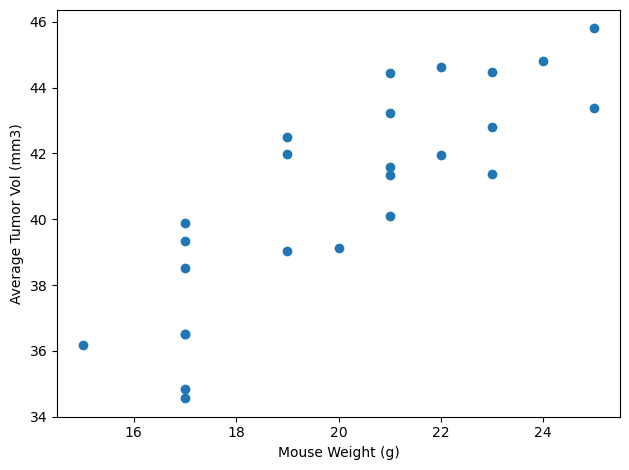

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = study_data_clean[study_data_clean['Drug Regimen'] == 'Capomulin']

average_tumor_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

capomulin_mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

plt.scatter(capomulin_mouse_weights, average_tumor_vol, label = 'Mouse Data')

plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Vol (mm3)')

plt.tight_layout()
plt.show()

## Correlation and Regression

The correlation between mouse weights and the average tumor volume is 0.84


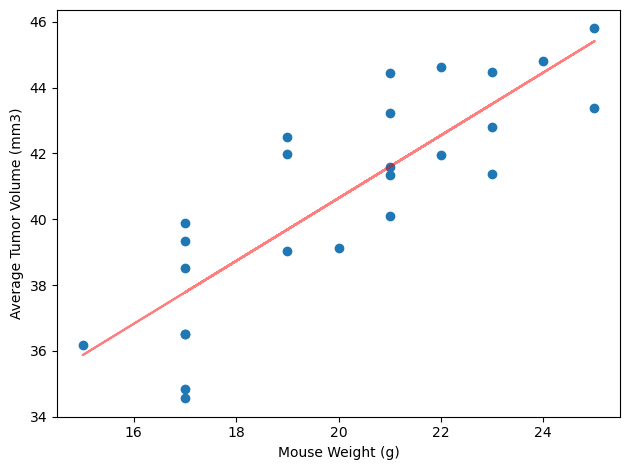

In [20]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coefficient, _ = st.pearsonr(capomulin_mouse_weights, average_tumor_vol)
print(f"The correlation between mouse weights and the average tumor volume is{correlation_coefficient: .2f}")

(slope, intercept, r_value, p_value, std_err) = st.linregress(capomulin_mouse_weights, average_tumor_vol)

regression_line = slope * capomulin_mouse_weights + intercept

plt.scatter(capomulin_mouse_weights, average_tumor_vol, )
plt.plot(capomulin_mouse_weights, regression_line, color='r', alpha = 0.5)

plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.tight_layout()
plt.show()